In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models

# Initialize nltk components
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load datasets
game_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv")
round_data = pd.read_csv("https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_round_data.csv")

# Inspect datasets
print("Game Data Preview:")
print(game_data.head())
print("\nRound Data Preview:")
print(round_data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Game Data Preview:
             game_id            condition  round_index  independent_wisdom  \
0  LtnXEGCJzhBnyARpj  dynamic_no_feedback            1            0.486667   
1  LtnXEGCJzhBnyARpj  dynamic_no_feedback            2            0.724167   
2  LtnXEGCJzhBnyARpj  dynamic_no_feedback            3            0.596667   
3  LtnXEGCJzhBnyARpj  dynamic_no_feedback            4            0.489167   
4  LtnXEGCJzhBnyARpj  dynamic_no_feedback            5            0.439167   

   revised_wisdom  revised_wisdom_error  independent_wisdom_error  \
0        0.570000              0.480000                  0.396667   
1        0.807500              0.027500                  0.055833   
2        0.487500              0.422500                  0.313333   
3        0.470833              0.000833                  0.019167   
4        0.408333              0.328333                  0.359167   

   correct_answer  task_instance_avg_error  top_1_ind  ...  top_12_rev  \
0            0.09      

# 1. Implement NLP methods

In [6]:
import pandas as pd

# 加载数据
game_data_url = "https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv"  # 替换为实际的URL
round_data_url ="https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_round_data.csv"

# Inspect datasets
df = pd.read_csv(game_data_url)
df = pd.read_csv(round_data_url)
# 检查数据结构
print(df.head())


  game_id condition  round_index  correct_answer plot_sequence  \
0     103   dynamic            1            0.09    easy->hard   
1      86    static            1            0.09    easy->hard   
2      86    static            1            0.09  medium->easy   
3      73    static            1            0.09  medium->easy   
4      82   dynamic            1            0.09  hard->medium   

                                           player_id  cumulative_score  \
0  y7gd5boo3cl0s6ndywyv6kkkgfx5tf0msk4jcmaqwwlwcm...              0.96   
1  l60q7ulnhyg1hozica9xq03v4s4ft4wpm5sfo9fprfxf8l...              0.69   
2  wgz8xv0gwamdduyxy1eg7xnf1lv301eicutdll3vhtfb4g...              0.58   
3  ol4dykm5w56gamoqs8rbdkqawwujoi5ahgic41khtumyde...              0.99   
4  qsx1yagowvkapla9t5e5w3e32xluu11zomczvwon816cd4...              0.71   

  difficulty  revised_guess  revised_error  ... half best_player ind_score  \
0       easy           0.05           0.04  ...    1       False      0.96   
1 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  plt.tight_layout()
<ipython-input-13-6428b2f0a0cc>:44: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  plt.tight_layout()
<ipython-input-13-642

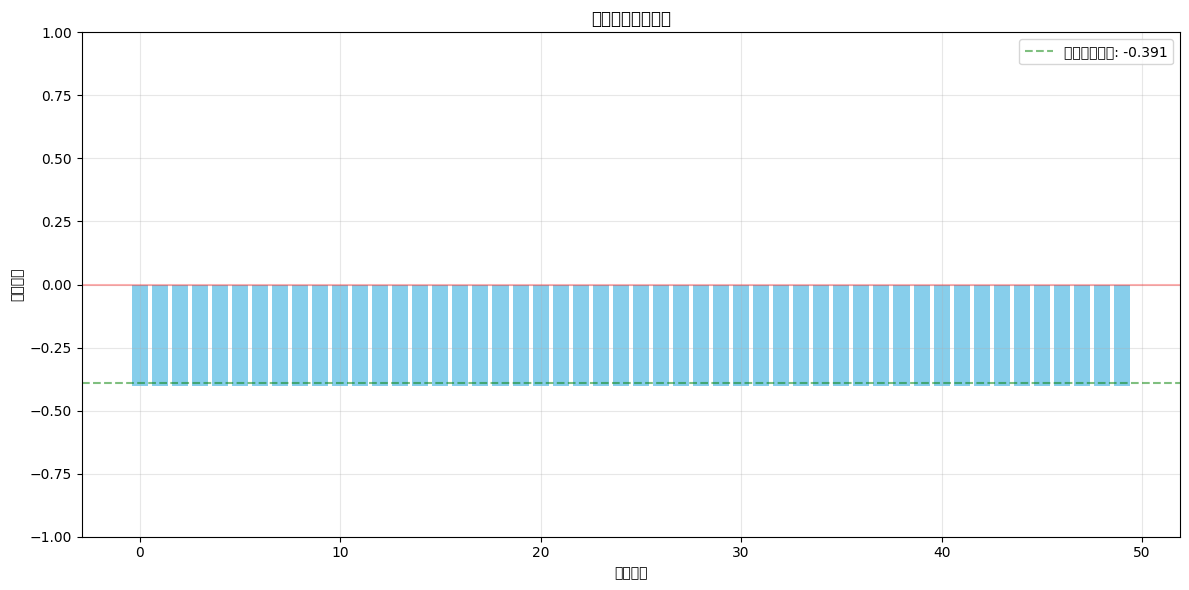


情感分数统计:
count    13700.000000
mean        -0.390919
std          0.063322
min         -0.401900
25%         -0.401900
50%         -0.401900
75%         -0.401900
max         -0.025800
Name: sentiment_score, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')


game_data_url = "https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv"
game_data = pd.read_csv(game_data_url)


game_data['text_for_sentiment'] = game_data.apply(
    lambda row: f"Score {row['revised_wisdom']} with error {row['revised_wisdom_error']} in condition {row['condition']}",
    axis=1
)

# 初始化情感分析器
sia = SentimentIntensityAnalyzer()

# 计算情感分数
game_data['sentiment_score'] = game_data['text_for_sentiment'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# 创建可视化
plt.figure(figsize=(12, 6))
plt.bar(range(50), game_data['sentiment_score'][:50], color='skyblue')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xlabel('样本序号')
plt.ylabel('情感分数')
plt.title('样本情感分数分布')
plt.ylim(-1, 1)
plt.grid(True, alpha=0.3)

# 添加平均值线
mean_sentiment = game_data['sentiment_score'].mean()
plt.axhline(y=mean_sentiment, color='g', linestyle='--', alpha=0.5,
            label=f'平均情感分数: {mean_sentiment:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# 打印一些统计信息
print("\n情感分数统计:")
print(game_data['sentiment_score'].describe())


## Visualization of sentiment analysis using Wordcloud

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Data Loaded Successfully
             game_id            condition  round_index  independent_wisdom  \
0  LtnXEGCJzhBnyARpj  dynamic_no_feedback            1            0.486667   
1  LtnXEGCJzhBnyARpj  dynamic_no_feedback            2            0.724167   
2  LtnXEGCJzhBnyARpj  dynamic_no_feedback            3            0.596667   
3  LtnXEGCJzhBnyARpj  dynamic_no_feedback            4            0.489167   
4  LtnXEGCJzhBnyARpj  dynamic_no_feedback            5            0.439167   

   revised_wisdom  revised_wisdom_error  independent_wisdom_error  \
0        0.570000              0.480000                  0.396667   
1        0.807500              0.027500                  0.055833   
2        0.487500              0.422500                  0.313333   
3        0.470833              0.000833                  0.019167   
4        0.408333              0.328333                  0.359167   

   correct_answer  task_instance_avg_error  top_1_ind  ...  top_12_rev  \
0            0.09

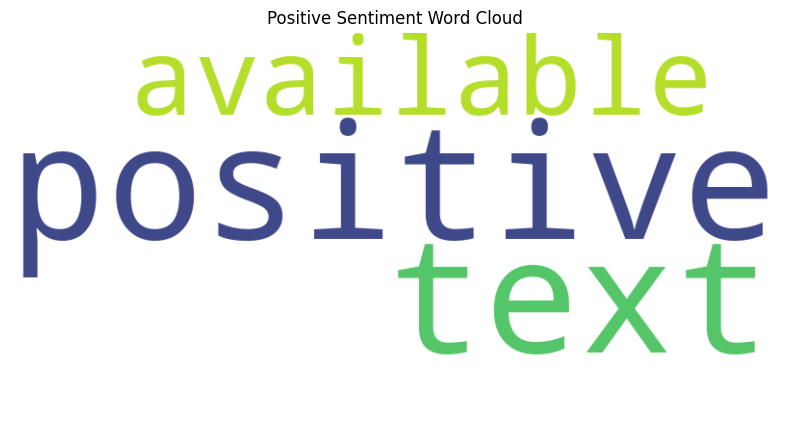

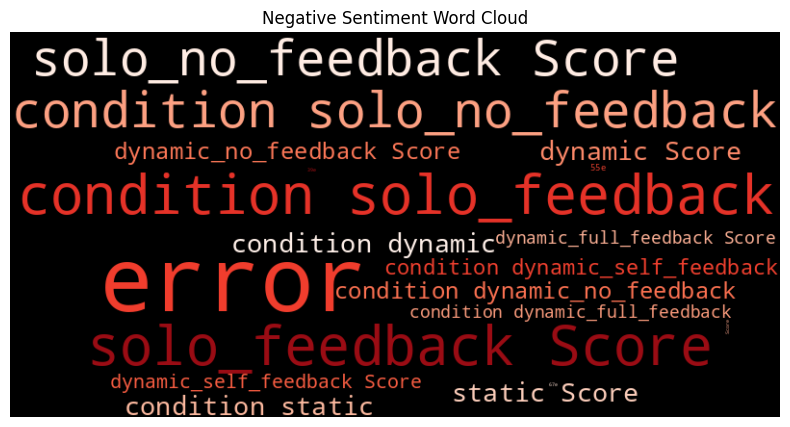

In [12]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# 下载所需的 NLTK 数据
nltk.download('vader_lexicon')

# 数据加载
game_data_url = "https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/all_studies_game_data.csv"
game_data = pd.read_csv(game_data_url)

# 确保数据成功加载
print("Data Loaded Successfully")
print(game_data.head())

# 创建新列用于情感分析
game_data['text_for_sentiment'] = game_data.apply(
    lambda row: f"Score {row['revised_wisdom']} with error {row['revised_wisdom_error']} in condition {row['condition']}",
    axis=1
)

# 初始化情感分析器
sia = SentimentIntensityAnalyzer()

# 计算情感分数
game_data['sentiment_score'] = game_data['text_for_sentiment'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

# 确保情感分数生成成功
print("\nSentiment Scores Added:")
print(game_data[['text_for_sentiment', 'sentiment_score']].head())

# 检查是否存在正面或负面文本
positive_texts = game_data[game_data['sentiment_score'] > 0]['text_for_sentiment'].dropna()
negative_texts = game_data[game_data['sentiment_score'] < 0]['text_for_sentiment'].dropna()

# 如果没有正面或负面文本，提供默认文本
if positive_texts.empty:
    print("No positive texts found. Using a placeholder.")
    positive_text = "No positive text available"
else:
    positive_text = " ".join(positive_texts)

if negative_texts.empty:
    print("No negative texts found. Using a placeholder.")
    negative_text = "No negative text available"
else:
    negative_text = " ".join(negative_texts)

# 生成正面文本词云
positive_wordcloud = WordCloud(
    width=800, height=400, background_color='white'
).generate(positive_text)

# 生成负面文本词云
negative_wordcloud = WordCloud(
    width=800, height=400, background_color='black', colormap='Reds'
).generate(negative_text)

# 绘制正面词云
plt.figure(figsize=(10, 5))
plt.title("Positive Sentiment Word Cloud")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 绘制负面词云
plt.figure(figsize=(10, 5))
plt.title("Negative Sentiment Word Cloud")
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#2. Prediction Task

In [ ]:

# Use features and target for supervised learning (replace columns as needed)
features = ['independent_wisdom', 'revised_wisdom', 'task_instance_avg_error', 'sentiment_score']
target = 'revised_wisdom_error'

# Drop rows with missing values in selected columns
game_data = game_data.dropna(subset=features + [target])

X = game_data[features]
y = game_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01103467347684125
R-squared: 0.04160679428007841


##Logistic Regression: Provides binary predictions for target variables


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00        97
           4       0.46      0.59      0.52      1764
           5       0.47      0.44      0.46      1817
           6       0.00      0.00      0.00       124

    accuracy                           0.48      4110
   macro avg       0.28      0.29      0.28      4110
weighted avg       0.44      0.48      0.46      4110

ROC AUC Score: 0.664


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


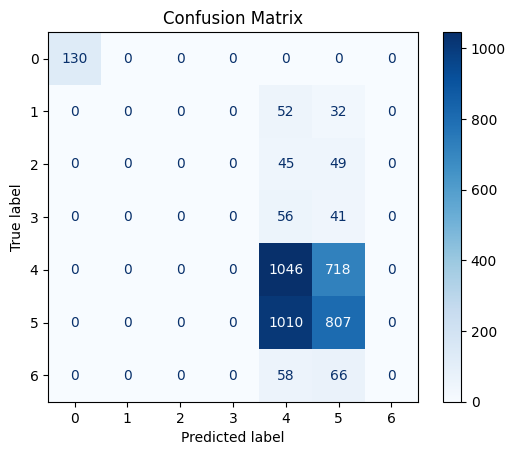

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


features = ['revised_wisdom', 'revised_wisdom_error', 'sentiment_score']
target = 'condition'

if not all(col in game_data.columns for col in features) or target not in game_data.columns:
    raise ValueError("Ensure the specified features and target exist in the dataset.")

X = game_data[features]
y = game_data[target]

if y.dtype == 'object':
    y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_proba = logistic_model.predict_proba(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.3f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


##Multiclassification ROC curve drawing

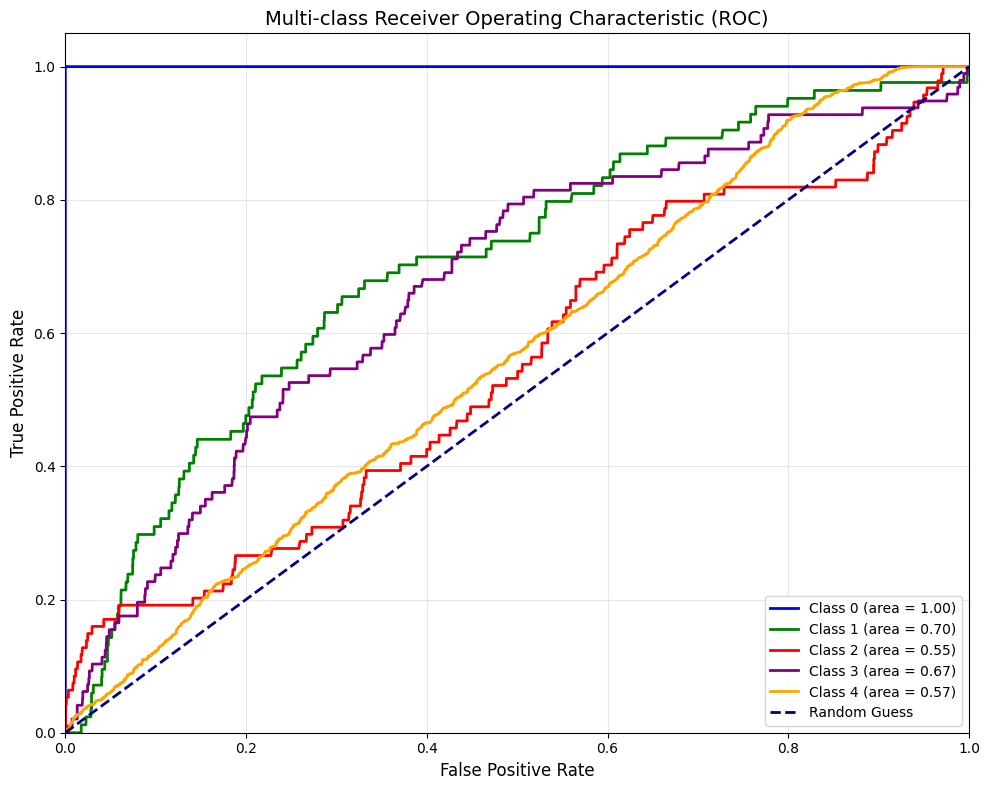

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, color in zip(range(n_classes), colors[:n_classes]):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"Class {i} (area = {roc_auc[i]:.2f})"
    )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-class Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
